# Одномерный анализ данных

В начале всегда загружаем необходимые библиотеки.
Для анализа данных обычно используется библиотека Pandas. Будем вызывать ее как `pd` для краткости. Тогда методы, которые есть в этой библиотеке, можно будет вызвать например так: `pd.head()` вместо `pandas.head()` для метода `head`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import dates

### Метеостанция Терскол
Данные с метеостанции Терскол постоянно используется всеми, кто занимается ледниками Приэльбрусья. 
Например, для моделирования ледника Джанкуат без этих данных не обойтись.

Первым делом загружаем данные из таблицы. Задаем названия колонок, которые нам подходят (год, месяц, день, средняя температура, осадки).

In [2]:
fields = ['year', 'month','day','Tmean','Prec'] # обозначение колонок

terskol_data = pd.read_csv("terskol_1977-2018.csv",
                           usecols=fields,delimiter=";",error_bad_lines=False,decimal=",")

`terskol_data` - это dataframe, с которым мы будем работать. Сперва нужно понять, что в нем содержится.

Легко посмотреть структуру массива с помощью метода head():

In [5]:
print(terskol_data.head())

   year  month  day  Tmean  Prec
0  1977      1    1  -11.9   0.0
1  1977      1    2  -15.0   0.0
2  1977      1    3  -19.4   0.0
3  1977      1    4  -20.6   0.0
4  1977      1    5  -18.9   0.0


Каждая переменная в датафрейме имеет свой тип. Для работы с числовыми переменными (температура, осадки) нужен тип float.
Проверим, какие типы переменных у нас, используя атрибут `dtype`:

In [ ]:
terskol_data.dtypes

Видим, что первые три колонки (год, месяц, день) имеют тип int, то есть они целочисленные, как и должно быть.
Последняя колонка Prec (осадки) имеет тип float, и это правильно. С Tmean придется разбираться.
Во-первых, Tmean имеет тип object, нужно поменять тип переменной на float с помощью метода  `to_numeric`. 
Во-вторых, для этого разделители десятичных знаков должны быть не запятыми, а точками, нужно поменять тип данных для колонки температуры, используя метод  `replace`.

In [4]:
terskol_data['Tmean']=pd.to_numeric(terskol_data['Tmean'].str.replace(',','.'), errors='coerce')

Теперь для того, чтобы с временным метеорядом было удобно работать, нужно, чтобы индексация была по дате.
Для этого в библиотеке Pandas есть метод to_datetime, для которого нужно задать требуемый формат даты, которая получится, в нашем случае `'%Y%m%d'` означает год-месяц-день.

In [6]:
# создаем колонку для времени
terskol_data['myDt']=pd.to_datetime(terskol_data[['year','month','day']],format='%Y%m%d',errors='coerce')

# делаем эту колонку индексом
terskol_data.set_index('myDt', inplace=True)

# любуемся на результат
print(terskol_data.head())

            year  month  day  Tmean  Prec
myDt                                     
1977-01-01  1977      1    1  -11.9   0.0
1977-01-02  1977      1    2  -15.0   0.0
1977-01-03  1977      1    3  -19.4   0.0
1977-01-04  1977      1    4  -20.6   0.0
1977-01-05  1977      1    5  -18.9   0.0


Теперь можно работать с данными,выбирая нужные колонки, например температуру:

In [ ]:
T_terskol=terskol_data.Tmean

Как вывести значения температуры в первой строке:

In [ ]:
terskol_data.Tmean[0]

Как вывести значения температуры в июле 1977: используем метод `loc`:

In [ ]:
terskol_data.Tmean.loc['1977-07-01':'1977-07-31']

Метод describe() нужен для того, чтобы получить быстрое численное описание данных: количество значений, среднее, стандартное отклонение, минимум, $Q_1$, медиана, $Q_3$, максимум.
Заметим, что у Tmean и Prec минимум равен -999 либо -999.9, это обозначение отсутствующих данных.

In [27]:
terskol_data.describe()

year         month           day         Tmean          Prec
count  15135.000000  15135.000000  15135.000000  15134.000000  15135.000000
mean    1997.599207      6.511331     15.731087      2.743234      2.698051
std       12.139896      3.431866      8.803613      8.043604      6.625356
min     1977.000000      1.000000      1.000000    -22.400000      0.000000
25%     1987.000000      4.000000      8.000000     -3.200000      0.000000
50%     1998.000000      7.000000     16.000000      3.300000      0.000000
75%     2008.000000      9.000000     23.000000      9.600000      2.200000
max     2018.000000     12.000000     31.000000     22.700000    152.900000

Чтобы было удобнее работать с данными, нужно заменить числа -999 или -999.9 на NaN

In [26]:
terskol_data.loc[terskol_data.Prec == -999.90] = np.nan
terskol_data.loc[terskol_data.Prec == -999.00] = np.nan
terskol_data.loc[terskol_data.Tmean == -999.00] = np.nan

# Получилось?
terskol_data.describe()

Строим график:

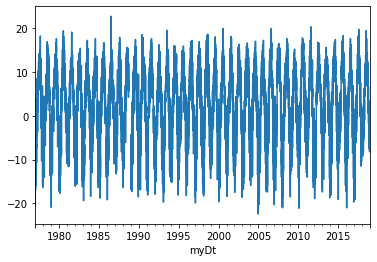

In [29]:
terskol_data.Tmean.plot()

Возьмем данные c апреля 2007 по октябрь 2017 года, для которых пропуска данных не должно быть:

In [ ]:
# Допишите нужный код:
#terskol_2007_2017 = terskol_data.loc...

Построим график температуры:

In [ ]:
# допишите нужный код
# terskol_2007_2017...

График осадков:

## Задание № 1: описательная статистика

Библиотека Seaborn позволяет строить красивые статистические графики влёгкую.
Строим гистограмму для температуры:

In [ ]:
sns.distplot(terskol_2007_2017.Tmean, kde = False).set_title("Histogram of Temperature in 2007-2017")

Строим boxplot:

In [ ]:
sns.boxplot(terskol_2007_2017.Tmean).set_title("Boxplot of Temperature in 2007-2017")

То же самое делаем для осадков.
Постройте гистограмму:

Постройте boxplot для осадков:

Чтобы получить более наглядную картину распределения осадков, уберем нулевые значения и 20% самых больших значений

In [ ]:
# terskol_prec = terskol_2007_2017.Prec.loc......
# terskol_prec_positive = terskol_prec(terskol_prec > 0)
# terskol_prec_trim = terskol_prec_positive.quantile(0.8)

#### Вопрос 1
Опишите распределения температуры и осадков:
1. mean, min, max, range, median, mode
2. standart deviation, IQR
3. skewness
4. форма распределения (унимодальное или бимодальное или?)
5. outliers


#### Вопрос 2
Сравните 2 временных ряда: метеоданные 1977-1987 гг. и 2007-2017 гг.:
1. В каком из этих десятилетий было в среднем холоднее?
2. В каком десятилетии дисперсия температуры больше?


## Задание № 2. Разделение данных на части
Разделим метеоданные по сезонам.
Для этого можно создать так называемый словарь. И пусть

In [ ]:
# Create a Seasonal Dictionary that will map months to seasons
SeasonDict = {11: 'Autumn', 12: 'Winter', 1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', \
8: 'Summer', 9: 'Autumn', 10: 'Autumn'}


Создадим новую колонку "сезон" в нашей базе данных

In [ ]:
terskol_data['Season'] = ""

Заполним ее нужными значениями в цикле:

In [ ]:
for i in range(len(terskol_data)):
    terskol_data.Season[i] = SeasonDict[terskol_data.month[i]]

Можно создать отдельные переменные для каждого сезона. Возьмем 2017.

In [ ]:
terskol_2017 = terskol_data.loc['2016-03-01':'2017-02-28']

winter = terskol_2017.Tmean[terskol_2017.Season=='Winter']
spring = terskol_2017.Tmean[terskol_2017.Season=='Spring']
summer = terskol_2017.Tmean[terskol_2017.Season=='Summer']
fall = terskol_2017.Tmean[terskol_2017.Season=='Autumn']


Нарисуем 4 подграфика для каждого сезона. Зададим пределы оси ординат: минимальная и максимальная температура.

In [ ]:
min_temp = min(terskol_2007_2017.Tmean)
max_temp = max(terskol_2007_2017.Tmean)

Положение каждого подграфика определяется с помощью позиций axes[i][j]. winter.index значит, что мы обращаемся к индексу (нумерации строк) массива зимних температур, в нашем случае индексом служат даты. С помощью параметра lw задается толщина линии.
Менять параметры осей для каждого подграфика приходится в цикле: 
- задаем одинаковые оси y для каждого сезона
- задаем обозначения по оси x - дни (интервал 7 дней) и месяцы

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax11 = axes[0][0]

ax12 = axes[0][1]

ax21 = axes[1][0]

ax22 = axes[1][1]

line_width = 2.5

ax11.plot(winter.index, winter,lw=line_width);

ax12.plot(spring.index, spring,'tab:green',lw=line_width);

ax21.plot(summer.index, summer,'tab:red',lw=line_width);

ax22.plot(fall.index, fall,'tab:orange',lw=line_width);

yticks = np.arange(start=-25, stop=31, step=5)

# Iterate over all four axes that we have and apply same procedures to each one of them
for ax in [ax11, ax12, ax21, ax22]:
    # Set limits for y-axes
    ax.set_ylim(min_temp,max_temp)
    # Set minor ticks with day numbers
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
    # Set major ticks with month names
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n%b'))

Если данные нужны помесячные (например), в библиотеке Pandas есть метод resample. Посчитаем среднемесячные климатические данные за 2007-2017 годы.


In [12]:
terskol_2007_2017 = terskol_data.loc['2007-01-01':'2017-12-31']
terskol_2007_2017.head()

year  month  day  Tmean  Prec
myDt                                     
2007-01-01  2007      1    1  -13.9   0.0
2007-01-02  2007      1    2  -13.2   0.0
2007-01-03  2007      1    3   -3.6   0.0
2007-01-04  2007      1    4   -2.0   0.0
2007-01-05  2007      1    5   -3.8   0.0

С помощью resample посчитаем помесячные данные осадков (аргумент 'M' это и значит) - для этого их надо суммировать (применяем метод sum())

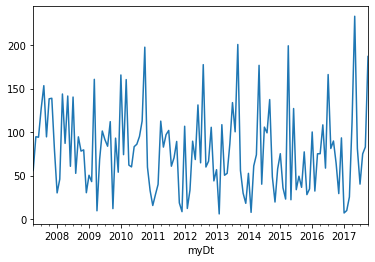

In [11]:
monthly_P_terskol_2007_2017 = terskol_2007_2017.Prec.resample('M').sum()
monthly_P_terskol_2007_2017.plot()

*Аналогичным образом посчитайте помесячные данные температуры - какой метод ресэмплинга при этом надо применить?*

In [ ]:
# Допишите код:
# monthly_T_terskol_2007_2017 = 
# monthly_T_terskol_2007_2017.plot()